In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, average_precision_score, precision_recall_curve
%matplotlib inline

In [2]:
os.getcwd()

'C:\\Users\\Andrew'

In [3]:
os.chdir('C://Users//Andrew/Desktop/')

In [4]:
df = pd.read_csv('heart-attack-prediction.csv')

In [5]:
df.head(7)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0
5,32,0,2,105,198,0,0,165,0,0.0,?,?,?,0
6,32,1,2,110,225,0,0,184,0,0.0,?,?,?,0


In [6]:
df = df.convert_objects(convert_numeric=True)

C:\Users\Andrew\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [7]:
df2 = df.copy()

In [8]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num       '],
      dtype='object')

## Data wrangling/cleaning and exploratory data analysis

In [9]:
df.rename(columns = {'num       ': 'Num'}, inplace = True)

In [10]:
df['Num'].value_counts()

0    188
1    106
Name: Num, dtype: int64

In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,294.0,47.826531,7.811812,28.0,42.00,49.0,54.0,66.0
sex,294.0,0.724490,0.447533,0.0,0.00,1.0,1.0,1.0
cp,294.0,2.982993,0.965117,1.0,2.00,3.0,4.0,4.0
trestbps,293.0,132.583618,17.626568,92.0,120.00,130.0,140.0,200.0
chol,271.0,250.848708,67.657711,85.0,209.00,243.0,282.5,603.0
fbs,286.0,0.069930,0.255476,0.0,0.00,0.0,0.0,1.0
restecg,293.0,0.218430,0.460868,0.0,0.00,0.0,0.0,2.0
thalach,293.0,139.129693,23.589749,82.0,122.00,140.0,155.0,190.0
exang,293.0,0.303754,0.460665,0.0,0.00,0.0,1.0,1.0
oldpeak,294.0,0.586054,0.908648,0.0,0.00,0.0,1.0,5.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
age         294 non-null int64
sex         294 non-null int64
cp          294 non-null int64
trestbps    293 non-null float64
chol        271 non-null float64
fbs         286 non-null float64
restecg     293 non-null float64
thalach     293 non-null float64
exang       293 non-null float64
oldpeak     294 non-null float64
slope       104 non-null float64
ca          3 non-null float64
thal        28 non-null float64
Num         294 non-null int64
dtypes: float64(10), int64(4)
memory usage: 32.2 KB


In [13]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, 13].values

In [14]:
imputer = Imputer(missing_values= "NaN", strategy= "mean", axis= 0)
imputer = imputer.fit(X)
X = imputer.transform(X)

In [15]:
scale = StandardScaler()

In [16]:
X = scale.fit_transform(X)

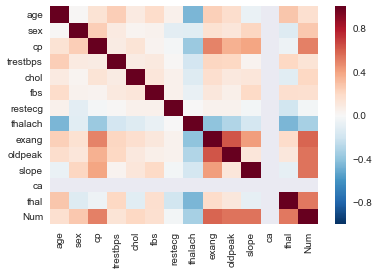

In [17]:
sns.heatmap(df.corr())

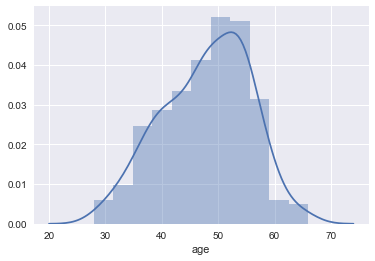

In [18]:
sns.distplot(df.age)

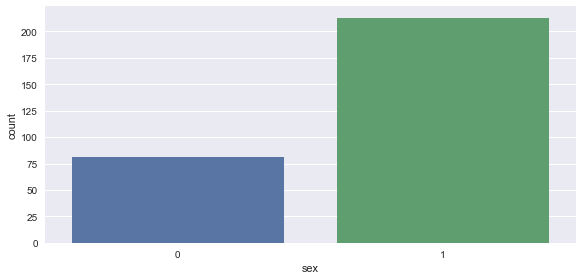

In [19]:
# There are significantly more men in the data than women
sns.factorplot('sex', data = df, kind = 'count', aspect = 2.0)

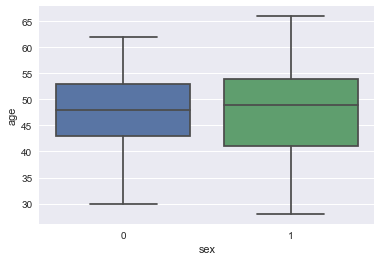

In [20]:
# A box plot to show the ranges of ages of the women and men in the data
sns.boxplot(data = df, x = 'sex', y = 'age')

In [21]:
hist_df = df.groupby('Num')

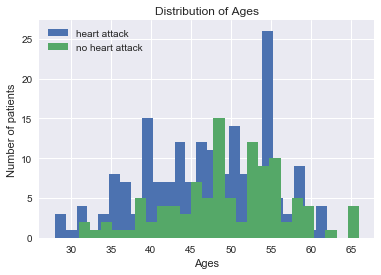

In [22]:
# A distribution of the ages of patients that suffered a heart attack and the ones that didn't
hist_df['age'].hist(bins = 25, label = hist_df['Num'])
plt.title('Distribution of Ages')
plt.xlabel('Ages')
plt.ylabel('Number of patients')
plt.legend(('heart attack ', 'no heart attack'), loc = 'upper left')
plt.show()

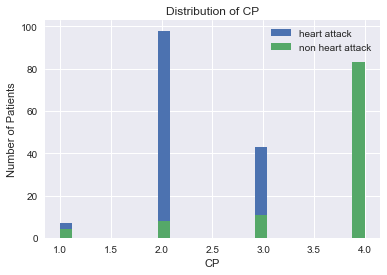

In [23]:
hist_df['cp'].hist(bins = 25)
plt.title('Distribution of CP')
plt.xlabel('CP')
plt.ylabel('Number of Patients')
plt.legend(('heart attack', 'non heart attack'))
plt.show()

In [24]:
heart_attack_patients = df[df['Num'] == 1]

patients_no_heart_attack = df[df['Num'] == 0]

In [25]:
# Seperating the dataframe into a women individually and men

men = df[df['sex'] == 1]
women = df[df['sex'] == 0]

In [26]:
# Seperating the individual data frames of men and women into with/with-out heart attacks
# to do continued summary statistics

men_without_heart_attacks = men[men['Num'] == 0]
men_heart_attacks = men[men['Num'] == 1]

women_without_heart_attacks = women[women['Num'] == 0]
women_with_heart_attacks = women[women['Num'] == 1]

In [27]:
men_heart_attacks.thalach.mean()

128.2659574468085

In [28]:
men_without_heart_attacks.thalach.mean()

144.8235294117647

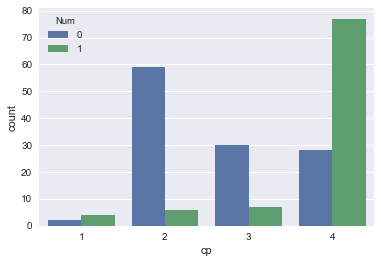

In [29]:
# Viewing the most occurring regions of chest pain for men
# 1 - typical angina
# 2 - atypical angina
# 3 - non-anginal pain
# 4 - asymptomatic
sns.countplot(x = 'cp', data = men, hue = 'Num')

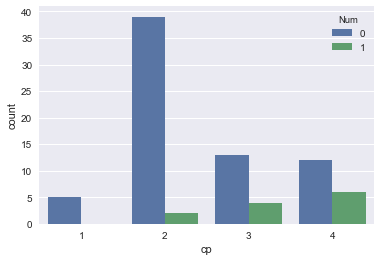

In [30]:
## Viewing the most occurring regions of chest pain for women
# 1 - typical angina
# 2 - atypical angina
# 3 - non-anginal pain
# 4 - asymptomatic
sns.countplot(x = 'cp', data = women, hue = 'Num')

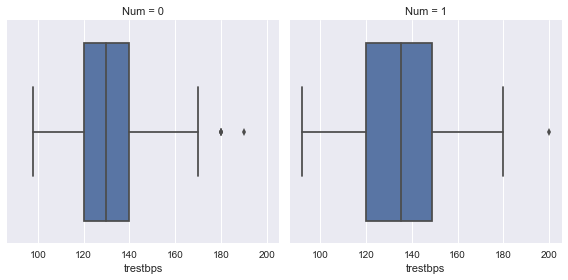

In [31]:
# A boxplot of the resting blood pressure of patients in categories
sns.factorplot(x = 'trestbps', data = df, col = 'Num', kind = 'box')

# Model Implementations

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [33]:
logistic_model = LogisticRegression()

In [34]:
logistic_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [35]:
logistic_predictions = logistic_model.predict(X_test)

In [36]:
print(confusion_matrix(y_test, logistic_predictions))
print('\n')
print(classification_report(y_test, logistic_predictions))
print('\n')
print('Accuracy of logistic regression classifier {}'.format(logistic_model.score(X_test, y_test)))

[[52  7]
 [ 9 21]]


             precision    recall  f1-score   support

          0       0.85      0.88      0.87        59
          1       0.75      0.70      0.72        30

avg / total       0.82      0.82      0.82        89



Accuracy of logistic regression classifier 0.8202247191011236


In [37]:
decision_tree = DecisionTreeClassifier()

In [38]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [39]:
tree_predictions = decision_tree.predict(X_test)

In [40]:
print(confusion_matrix(y_test, tree_predictions))
print('\n')
print(classification_report(y_test, tree_predictions))
print('Accuracy of decision tree classifier {}'.format(decision_tree.score(X_test, y_test)))

[[45 14]
 [11 19]]


             precision    recall  f1-score   support

          0       0.80      0.76      0.78        59
          1       0.58      0.63      0.60        30

avg / total       0.73      0.72      0.72        89

Accuracy of decision tree classifier 0.7191011235955056


In [41]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'Num'],
      dtype='object')

In [42]:
feature_labels = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal', 'Num']

In [43]:
random_forest = RandomForestClassifier(n_estimators= 300)

In [44]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [45]:
forest_predictions = random_forest.predict(X_test)

In [46]:
forest_score = random_forest.score(X_test, y_test)

In [47]:
forest_score

0.797752808988764

In [48]:
print(confusion_matrix(y_test, forest_predictions))
print('\n')
print(classification_report(y_test, forest_predictions))

[[51  8]
 [10 20]]


             precision    recall  f1-score   support

          0       0.84      0.86      0.85        59
          1       0.71      0.67      0.69        30

avg / total       0.80      0.80      0.80        89



## New Random Forest Model Implementation Process

* Identifying most important features in the random forest model


* Creating a new model with the most important features 


* Train the new random forest model using most important features

In [49]:
for feature in zip(feature_labels, random_forest.feature_importances_):
    print(feature)

('age', 0.081901356178374921)
('sex', 0.04699179153663282)
('cp', 0.12339826626570009)
('trestbps', 0.075685450166471657)
('chol', 0.10954191708439273)
('fbs', 0.01301595017268632)
('restecg', 0.020219755783876213)
('thalach', 0.10237772374416834)
('exang', 0.15729802524460176)
('oldpeak', 0.10768626954289778)
('slope', 0.12278259120494248)
('ca', 0.0)
('thal', 0.03910090307525476)


In [50]:
important_features = SelectFromModel(random_forest, threshold = 0.10)

In [51]:
important_features

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
        prefit=False, threshold=0.1)

In [52]:
important_features.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
        prefit=False, threshold=0.1)

In [53]:
for feature_list_index in important_features.get_support(indices= True):
    print(feature_labels[feature_list_index])

cp
chol
exang
oldpeak
slope


In [54]:
X_important_train = important_features.transform(X_train)
X_important_test = important_features.transform(X_test)

In [55]:
important_forest = RandomForestClassifier(n_estimators= 300)

In [56]:
important_forest.fit(X_important_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [57]:
y_important_feature_predictions = important_forest.predict(X_important_test)

In [58]:
print(confusion_matrix(y_test, y_important_feature_predictions))
print('\n')
print(classification_report(y_test, y_important_feature_predictions))

[[50  9]
 [ 8 22]]


             precision    recall  f1-score   support

          0       0.86      0.85      0.85        59
          1       0.71      0.73      0.72        30

avg / total       0.81      0.81      0.81        89



# Project and Model Performance Summary

#### Data:
* This data was composed of 4 different databases including Clevland Clinic Foundation, V.A Medical Center, University Hospital in Zurich, Switzerland, and the Hungarian Insitute of Cardiology,  all of which had the same format for instances.  


* There are only 14 raw attributes used in the data as opposed to the 76 original raw attributes of the overall data.

#### Objective: 
* The objective was to create a model that would correctly classify patients with a high risk of heart attack 

#### Result:
* The result after trying several approaches on the data that was presented is that we have a model that can correctly classify patients with the risk of having a heart attack 80% of the time


#### Concerns:
* Even though the logistic model was able to classify with 80% accuracy the amount of miscalculatoin is concerning especially in regards to the type 2 errors 

### Model Performance Summary

* Initially the logistic regression model outperformed the decision tree classifier and the random forest


* After selecting the most important features from the random forest and new model was trained on those features and was still unable to outperform the logistic regression model